<a href="https://colab.research.google.com/github/AkankshaSingh2215/MachineLearning/blob/master/Whatsapp_group_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WhatsApp Group Chat Analysis**

In [ ]:
pip install emoji --upgrade

In [73]:
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
% matplotlib inline
warnings.filterwarnings('ignore')

DATA PREPARATION

In [9]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [10]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [11]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

# To get the data

In [17]:
from google.colab import files
uploaded = files.upload()
data = [] #to keep track of data 
parsedData = []
conversation = 'WhatsApp Chat with DWAO TARGET - INTERNAL 💯.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline() 
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

Saving WhatsApp Chat with DWAO TARGET - INTERNAL 💯.txt to WhatsApp Chat with DWAO TARGET - INTERNAL 💯.txt


In [18]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])
df.head(10)

,Date,Time,Author,Message
0,2021-05-02,09:48,None,"Abhishek DWAO created group ""DWAO TARGET INTER..."
1,2021-12-03,19:20,None,Abhishek DWAO added you
2,2021-12-03,19:29,None,Abhishek DWAO added Tushar Tayal DWAO
3,2021-03-15,13:21,None,+91 88221 15428 changed to +91 84492 50501
4,2021-03-16,15:59,None,+91 84492 50501 changed to +91 88221 15428
5,2021-03-16,21:58,None,+91 88221 15428 changed to +91 84492 50501
6,2021-03-16,23:08,Abhishek DWAO,IMG-20210316-WA0003.jpg (file attached)
7,2021-03-16,23:10,Divya Mam DWAO,👍🏻🤘
8,2021-03-16,23:11,+91 84549 58837,💯
9,2021-03-16,23:18,Amit DWAO,<Media omitted>


In [23]:
df = df.dropna() #remove none
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 6 to 631
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     603 non-null    datetime64[ns]
 1   Time     603 non-null    object        
 2   Author   603 non-null    object        
 3   Message  603 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 23.6+ KB


**Printing Participants:**

In [24]:
df.Author.unique()

array(['Abhishek DWAO', 'Divya Mam DWAO', '+91 84549 58837', 'Amit DWAO',
       'Tushar Tayal DWAO', 'Akanksha', '+91 84492 50501', 'Faisal DWAO',
       '+91 96779 97850', '+91 96548 53405'], dtype=object)

In [25]:
def get_colors_of_certain_order(names_in_certain_order):
    '''the color of a certain person remains the same, no matter the plot'''
    
    order = list(names_in_certain_order)
    return_list = []
    
    for name in order:
        return_list.append(color_dict[name])
        
    return return_list

{'+91 84549 58837': '#577590',
 'Abhishek DWAO': '#90BE6D',
 'Amit DWAO': '#003F88',
 'Divya Mam DWAO': '#F3722C'}

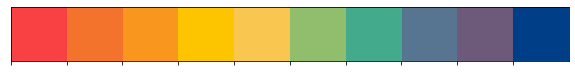

In [26]:
colors = ['#F94144', '#F3722C', '#F8961E', '#FDC500', '#F9C74F', '#90BE6D', '#43AA8B', '#577590', '#6D597A','#003F88']
sns.palplot(colors)    # visualizing the colors list

names = df.Author

color_dict = {}
for name, color in zip(names, colors):
    color_dict[name] = color
color_dict

## Group Wise Stats:

---



---



Total no. of msgs

In [27]:
total_messages = df.shape[0]
print(total_messages)

603


Total no. of media msg

In [28]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0] 
print(media_messages)

44


In [76]:
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)

    return emoji_list

total_messages = df.shape[0]
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

Total no. of emojis

In [77]:
emojis = sum(df['emoji'].str.len())
print(emojis)

667


In [85]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

In [87]:
print("DWAO TARGET TEAM")
print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

DWAO TARGET TEAM
Messages: 603
Media: 44
Emojis: 667
Links: 0


In [ ]:
#Separate the media messages and text messages
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df.info()
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

## Author wise stats

---



---



In [89]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df.info()
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["Abhishek DWAO", "Divya Mam DWAO", "Amit DWAO", "Akanksha", "Faisal DWAO", "Tushar Tayal DWAO", "+91 84492 50501", "91 96548 53405", "+91 96779 97850", "+91 84549 58837"]
for i in range(len(l)):
 
  req_df= messages_df[messages_df["Author"] == l[i]]
 
  print(f'Stats of {l[i]} -')
  print('Messages Sent', req_df.shape[0])
 
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
 
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)   
  print()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 6 to 631
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      559 non-null    datetime64[ns]
 1   Time      559 non-null    object        
 2   Author    559 non-null    object        
 3   Message   559 non-null    object        
 4   emoji     559 non-null    object        
 5   urlcount  559 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 30.6+ KB
Stats of Abhishek DWAO -
Messages Sent 126
Words per message 5.611111111111111
Media Messages Sent 9
Emojis Sent 69
Links Sent 0

Stats of Divya Mam DWAO -
Messages Sent 112
Words per message 3.9732142857142856
Media Messages Sent 3
Emojis Sent 162
Links Sent 0

Stats of Amit DWAO -
Messages Sent 77
Words per message 3.6363636363636362
Media Messages Sent 14
Emojis Sent 118
Links Sent 0

Stats of Akanksha -
Messages Sent 38
Words per message 3.2368421052

## Emoji Stats

---



---



In [ ]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

Unique emojis used in group

In [96]:
#Unique emojis used in group
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)
print(total_emojis)

77


Most used emoji

In [97]:
#Most used emoji
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
print(emoji_dict)

[('😂', 261), ('🤣', 107), ('😁', 22), ('😌', 19), ('🥳', 19), ('😅', 18), ('😶', 17), ('😍', 9), ('🤭', 9), ('🤪', 8), ('😜', 8), ('🤞', 8), ('🥺', 7), ('🙌', 7), ('🤦🏻\u200d♀️', 6), ('🤨', 6), ('😄', 6), ('👍🏻', 5), ('😎', 5), ('🤒', 5), ('😕', 5), ('😛', 5), ('😒', 5), ('🙄', 4), ('🍻', 4), ('🙈', 4), ('✌🏻', 4), ('👏', 4), ('🤔', 4), ('😃', 4), ('😝', 4), ('😬', 4), ('🤫', 4), ('🔥', 3), ('🎉', 3), ('😊', 3), ('🤦🏼\u200d♀️', 3), ('🎂', 3), ('\U0001f972', 2), ('🙌🏻', 2), ('😡', 2), ('☹️', 2), ('🤓', 2), ('😑', 2), ('🤘', 1), ('💯', 1), ('🎨', 1), ('💖', 1), ('😥', 1), ('✌️', 1), ('😢', 1), ('🧐', 1), ('😰', 1), ('🤩', 1), ('🎈', 1), ('🎁', 1), ('♾️', 1), ('🙆🏻\u200d♂️', 1), ('😆', 1), ('🥴', 1), ('🐋', 1), ('🤷\u200d♂️', 1), ('🐽', 1), ('👻', 1), ('✔', 1), ('✋', 1), ('🤘🏻', 1), ('👎🏼', 1), ('☝️', 1), ('🙃', 1), ('😏', 1), ('🙁', 1), ('🤦🏻\u200d♂️', 1), ('😣', 1), ('😳', 1), ('😮', 1), ('🤕', 1)]


In [98]:
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

,emoji,count
0,😂,261
1,🤣,107
2,😁,22
3,😌,19
4,🥳,19
...,...,...
72,🤦🏻‍♂️,1
73,😣,1
74,😳,1
75,😮,1


In [99]:
#Emoji distribution visualisation
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

 **Person Wise Emoji Distribution**





In [100]:
l = ["Abhishek DWAO", "Divya Mam DWAO", "Amit DWAO", "Akanksha", "Faisal DWAO", "Tushar Tayal DWAO", "+91 84492 50501", "91 96548 53405", "+91 96779 97850", "+91 84549 58837"]
l = messages_df.Author.unique()
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  total_emojis_list = list([a for b in dummy_df.emoji for a in b])
  emoji_dict = dict(Counter(total_emojis_list))
  emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
  print('Emoji Distribution for', l[i])
  author_emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
  fig = px.pie(author_emoji_df, values='count', names='emoji')
  fig.update_traces(textposition='inside', textinfo='percent+label')
  fig.show()

Emoji Distribution for Abhishek DWAO


Emoji Distribution for Divya Mam DWAO


Emoji Distribution for +91 84549 58837


Emoji Distribution for Amit DWAO


Emoji Distribution for Tushar Tayal DWAO


Emoji Distribution for Akanksha


Emoji Distribution for +91 84492 50501


Emoji Distribution for Faisal DWAO


Emoji Distribution for +91 96779 97850


Emoji Distribution for +91 96548 53405


# **Day wise** **Distribution** 

In [101]:
def f(i):
  l = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  return l[i];
day_df=pd.DataFrame(messages_df["Message"])
day_df['day_of_date'] = messages_df['Date'].dt.weekday
day_df['day_of_date'] = day_df["day_of_date"].apply(f)
day_df["messagecount"] = 1
day = day_df.groupby("day_of_date").sum()
day.reset_index(inplace=True)

In [102]:
fig = px.line_polar(day, r='messagecount', theta='day_of_date', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    )),
  showlegend=False
)
fig.show()

**Number of messages as times move on**

In [103]:
date_df = messages_df.groupby("Date").sum()
date_df.reset_index(inplace=True)
fig = px.line(date_df, x="Date", y="MessageCount")
fig.update_xaxes(nticks=20)
fig.show()

Chatter

In [105]:
auth = messages_df.groupby("Author").sum()
auth.reset_index(inplace=True)
fig = px.bar(auth, y="Author", x="MessageCount", color='Author', orientation="h",
             color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta","orange","black","purple"],
             title="Explicit color sequence"
            )

fig.show()

**When are the group members most active?**

Text(0, 0.5, 'Time')

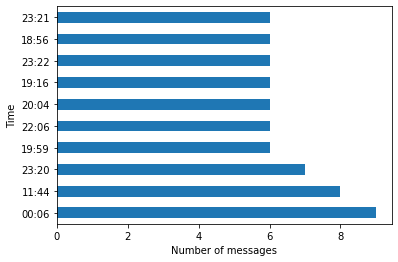

In [106]:
messages_df['Time'].value_counts().head(10).plot.barh() # Top 10 Times of the day at which the most number of messages were sent
plt.xlabel('Number of messages')
plt.ylabel('Time')

**The most happening day was :**

2021-05-06    102
2021-04-06     45
2021-07-05     35
2021-04-28     33
2021-07-06     30
2021-02-07     28
2021-06-22     26
2021-03-24     23
2021-05-19     22
2021-09-04     20
2021-05-17     17
2021-03-25     15
2021-11-05     14
2021-06-18     12
2021-04-20     12
2021-03-16     11
2021-03-04      9
2021-03-29      9
2021-04-30      8
2021-06-16      8
2021-01-05      7
2021-04-24      6
2021-03-30      6
2021-06-14      5
2021-04-17      5
2021-05-28      4
2021-03-05      4
2021-09-06      4
2021-04-14      4
2021-05-27      3
2021-03-31      3
2021-04-22      3
2021-06-28      3
2021-10-05      3
2021-12-06      3
2021-02-05      3
2021-04-25      3
2021-10-06      3
2021-04-04      2
2021-05-30      2
2021-03-27      1
2021-05-15      1
2021-06-29      1
2021-03-23      1
Name: Date, dtype: int64


Text(0, 0.5, 'Date')

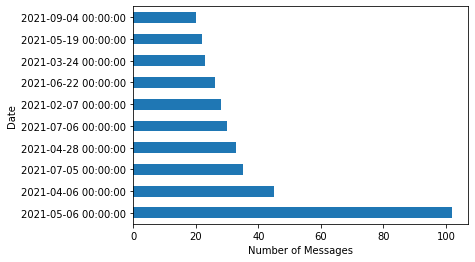

In [107]:
messages_df['Date'].value_counts().head(10).plot.barh()
print(messages_df['Date'].value_counts())
plt.xlabel('Number of Messages')
plt.ylabel('Date')

**Message Having Maximum number of words**

In [108]:
messages_df.iloc[messages_df['Word_Count'].argmax()]


Date                                          2021-10-06 00:00:00
Time                                                        12:27
Author                                              Abhishek DWAO
Message         Hi Team, all Airtel Networks are dropping here...
emoji                                                          []
urlcount                                                        0
Letter_Count                                                  127
Word_Count                                                     22
MessageCount                                                    1
Name: 530, dtype: object

In [109]:
#total no. of words 
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))

There are 12473 words in all the messages.


## Word Cloud

---



---



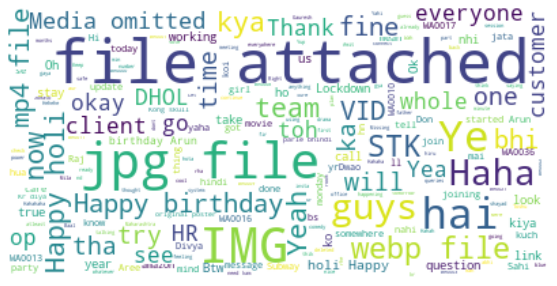

In [112]:
stopwords = set(STOPWORDS)
stopwords.update(["ra", "ga", "na", "ani", "em", "ki", "ah","ha","la","eh","ne","le","ni","lo","Ma","Haa","ni"])
  # Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
 
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name Abhishek DWAO


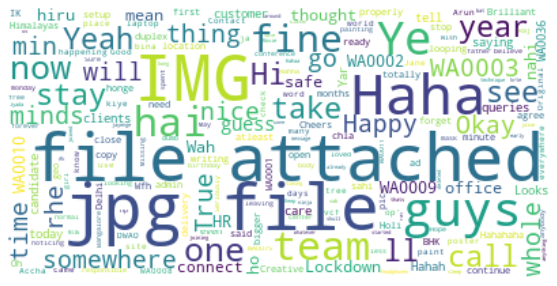

Author name Divya Mam DWAO


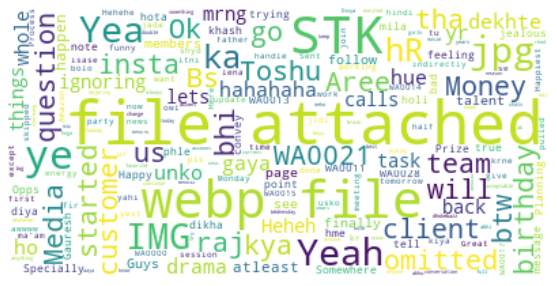

Author name +91 84549 58837


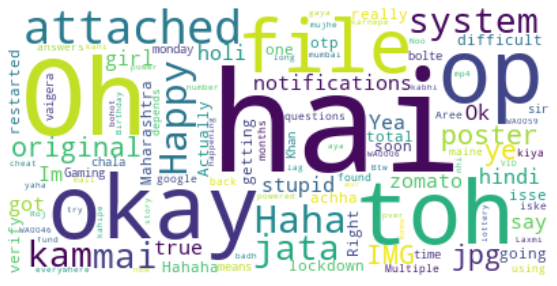

Author name Amit DWAO


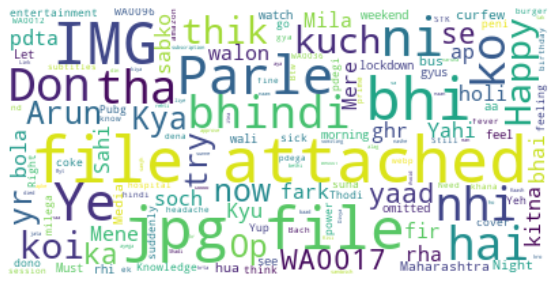

Author name Tushar Tayal DWAO


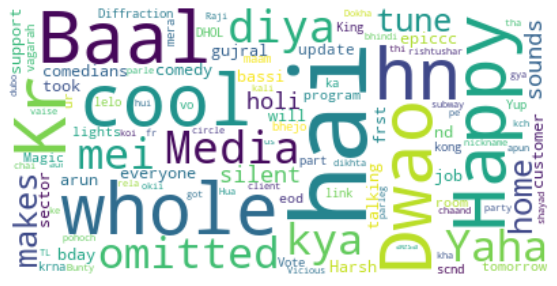

Author name Akanksha


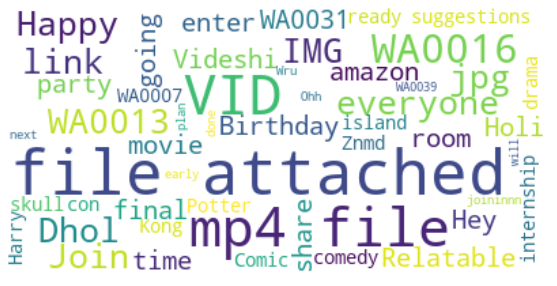

Author name +91 84492 50501


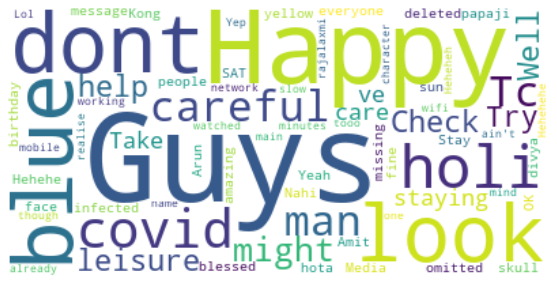

Author name Faisal DWAO


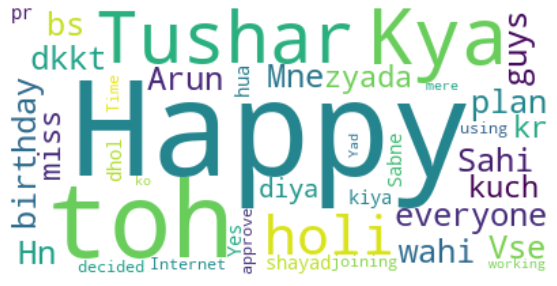

Author name +91 96779 97850


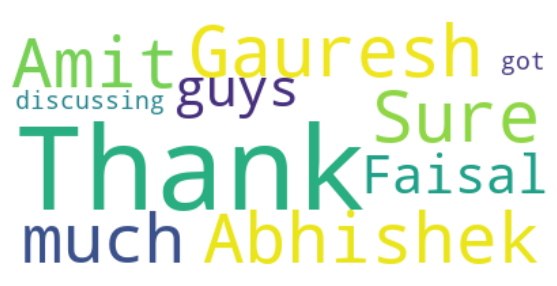

Author name +91 96548 53405


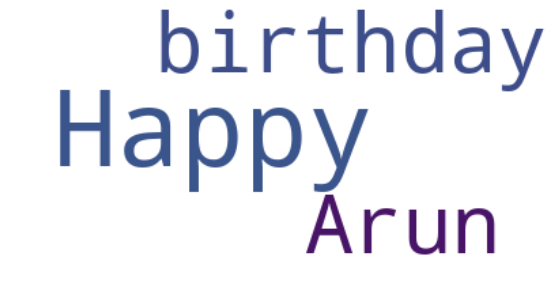

In [113]:
l = messages_df.Author.unique()
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  stopwords.update(["ra", "ga", "na", "ani", "em", "ki", "ah","ha","anta","kuda","ante","la","eh","Nen","ne","haa","Haa","le"])
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()